In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Practica2/Salary_dataset.csv')

In [5]:
# Extraer las columnas de YearsExperience y Salary del DataFrame
YearsExperience = df['YearsExperience'].values
Salary = df['Salary'].values

# Inicializar los coeficientes de regresión (m y b)
m = 0  # Pendiente
b = 0  # Ordenada al origen

# Función para predecir el salario
def PredictSalary(experience):
    return m * experience + b

# Función de pérdida (MSE)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradiente de la función de pérdida con respecto a m y b
def gradient(X, y, m, b):
    n = len(X)
    y_pred = m * X + b
    gradient_m = (-2 / n) * np.sum(X * (y - y_pred))
    gradient_b = (-2 / n) * np.sum(y - y_pred)
    return gradient_m, gradient_b

In [6]:
# Número de épocas y tasa de aprendizaje
epochs = 1000
learning_rate = 0.01

# Descenso del gradiente para ajustar los coeficientes de la regresión lineal
for epoch in range(epochs):
    gradient_m, gradient_b = gradient(YearsExperience, Salary, m, b)
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b
    loss = mse_loss(Salary, m * YearsExperience + b)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss (Regresión Lineal): {loss}')

# Coeficientes finales de la regresión lineal
print(f'Coeficiente (m) de Regresión Lineal: {m}')
print(f'Ordenada al origen (b) de Regresión Lineal: {b}')


# Generar valores para la línea de regresión con los nuevos coeficientes
x_values = np.linspace(min(YearsExperience), max(YearsExperience), 100)
y_values = PredictSalary(x_values)

Epoch 0, Loss (Regresión Lineal): 514619474.06140655
Epoch 100, Loss (Regresión Lineal): 79460869.68236214
Epoch 200, Loss (Regresión Lineal): 52416999.28167956
Epoch 300, Loss (Regresión Lineal): 40549974.10523573
Epoch 400, Loss (Regresión Lineal): 35342646.7348606
Epoch 500, Loss (Regresión Lineal): 33057637.81821284
Epoch 600, Loss (Regresión Lineal): 32054961.132498022
Epoch 700, Loss (Regresión Lineal): 31614980.120279048
Epoch 800, Loss (Regresión Lineal): 31421913.607542478
Epoch 900, Loss (Regresión Lineal): 31337194.773535784
Coeficiente (m) de Regresión Lineal: 9504.801321957242
Ordenada al origen (b) de Regresión Lineal: 24474.557566113308


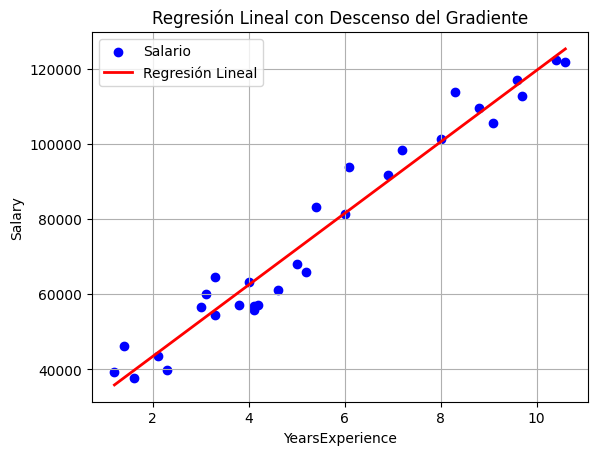

In [7]:
# Crear la gráfica
plt.scatter(YearsExperience, Salary, color='blue', label='Salario')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Regresión Lineal')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

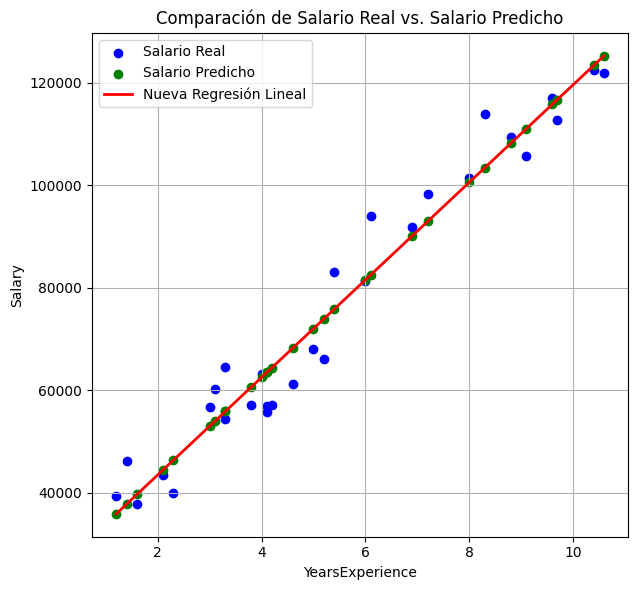

In [8]:
# Crear una gráfica para la nueva predicción después del descenso del gradiente
plt.figure(figsize=(12, 6))
predicted_salary = PredictSalary(YearsExperience)
plt.subplot(1, 2, 2)
plt.scatter(YearsExperience, Salary, color='blue', label='Salario Real')
plt.scatter(YearsExperience, predicted_salary, color='green', label='Salario Predicho')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Nueva Regresión Lineal')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Comparación de Salario Real vs. Salario Predicho')
plt.legend()
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [9]:
# Extraer las columnas de YearsExperience y Salary del DataFrame
YearsExperience = df['YearsExperience'].values
Salary = df['Salary'].values

# Función objetivo
def objective_function(theta0, theta1):
    return 10 - np.exp(-(theta0*2 + 3*theta1*2))

# Función de costo (MSE)
def cost_function(theta0, theta1):
    m = len(YearsExperience)
    predictions = theta0 + theta1 * YearsExperience
    error = predictions - Salary
    mse = (1/(2*m)) * np.sum(error**2)
    return mse

# Descenso del gradiente
def gradient_descent(theta0, theta1, learning_rate, iterations):
    m = len(YearsExperience)
    theta0_values = []
    theta1_values = []
    cost_values = []
    for _ in range(iterations):
        predictions = theta0 + theta1 * YearsExperience
        error = predictions - Salary
        gradient_theta0 = (1/m) * np.sum(error)
        gradient_theta1 = (1/m) * np.sum(error * YearsExperience)
        theta0 -= learning_rate * gradient_theta0
        theta1 -= learning_rate * gradient_theta1
        # Registrar valores intermedios
        theta0_values.append(theta0)
        theta1_values.append(theta1)
        cost = cost_function(theta0, theta1)
        cost_values.append(cost)
    return theta0_values, theta1_values, cost_values

# Inicialización de parámetros y configuración del descenso del gradiente
initial_theta0 = 0
initial_theta1 = 0
learning_rate = 0.001
iterations = 1000

# Ejecutar descenso del gradiente y obtener los valores intermedios
theta0_values, theta1_values, cost_values = gradient_descent(initial_theta0, initial_theta1, learning_rate, iterations)

# Imprimir los parámetros finales
print("Parámetro theta0:", theta0_values)
print("Parámetro theta1:", theta1_values)

Parámetro theta0: [76.004, 149.3065054424889, 220.00982275120307, 288.2123825979584, 354.00888673098575, 417.49044924084615, 478.744732474652, 537.8560778013363, 594.9056314230324, 649.9714654202373, 703.1286942113188, 754.449586600091, 804.0036735785988, 851.8578520459182, 898.0764845976926, 942.7214955352578, 985.8524632375738, 1027.5267090337545, 1067.7993827087635, 1106.7235447698288, 1144.3502455962885, 1180.728601590938, 1215.9058684464724, 1249.927511636314, 1282.8372742349786, 1314.6772421691462, 1345.4879069967699, 1375.3082263078725, 1404.1756818371296, 1432.1263353749243, 1459.1948825602788, 1485.4147046359005, 1510.8179182425522, 1535.4354233270178, 1559.2969492351322, 1582.4310990586298, 1604.8653923019654, 1626.6263059327512, 1647.739313877047, 1668.2289250184162, 1688.1187197574336, 1707.4313851861768, 1726.1887489301755, 1744.411811708296, 1762.1207786591333, 1779.3350894806395, 1796.0734474279477, 1812.3538472126468, 1828.1936018451247, 1843.6093684600212, 1858.6171731

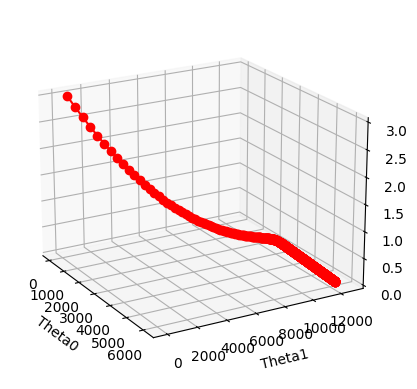

In [10]:
# Crear una cuadrícula de puntos en el espacio X y Y
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

# Calcular los valores de Z utilizando la función de optimización
Z = objective_function(X, Y)

# Crear una figura para visualizar el proceso
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie de la función de optimización
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Dibujar las soluciones encontradas por el descenso de gradiente
ax.plot(theta0_values, theta1_values, cost_values, marker='o', linestyle='-', color='red')

# Configurar etiquetas
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Costo')

# Cambiar inclinación
ax.view_init(elev=20, azim=-30)

# Mostrar figura
plt.show()